In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("ex2data2.txt", header = None)
X = df.iloc[:,:2]
y = df.iloc[:,2][:,np.newaxis]
m = X.shape[0]
X = np.column_stack((np.ones((m,1)), X))
n = X.shape[1]

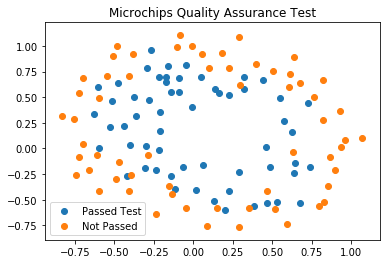

In [3]:
alpha = 0.001
iterations = 40000
admitted = df.iloc[:,2] == 1
notadmitted = df.iloc[:,2] == 0
plt.scatter(X[admitted,1],X[admitted,2], label = 'Passed Test')
plt.scatter(X[notadmitted,1],X[notadmitted,2], label = 'Not Passed')
plt.title("Microchips Quality Assurance Test")
plt.legend()

In [4]:
def MapFeature(X1,X2):
    degree=6
    out=np.ones((m,1))
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,(np.power(X1,i-j) * np.power(X2,j))[:,np.newaxis]))
    return out

In [5]:
# Create New Features
X_mapped = MapFeature(X[:,1],X[:,2])
initial_theta = np.zeros((X_mapped.shape[1],1))

In [6]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [7]:
def CostFunctionRegularization(X, y, theta, l):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n,1))
    ghx = sigmoid(X @ theta)
    tosum = (y * np.log(ghx)) + ((1 - y) * np.log(1 - ghx))
    J = (-sum(tosum))/m
    # Since we dont Regularize Theta0
    J = J + (l/(2*m)) * sum(theta**2)
#     grad = (sum((ghx - y)* X)/m)[:,np.newaxis] + ((l/m) * theta)
    g0= 1/m * (X.T @ (ghx - y))[0]
    g1 = 1/m * (X.T @ (ghx - y))[1:] + (l/m)* theta[1:]
    grad= np.vstack((g0[:,np.newaxis],g1))
    return J,grad

In [8]:
l =1
J,grad = CostFunctionRegularization(X_mapped, y, initial_theta, l)
print(J,grad[:5])

[0.69314718] [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [9]:
test_theta = np.ones((X_mapped.shape[1],1))
J,grad = CostFunctionRegularization(X_mapped, y, test_theta, 10)
print(J,grad[:5])

[3.20688221] [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


In [10]:
def GradientDescent(X, y, theta,alpha,num_iters,l):
    m = X.shape[0]
    n = X.shape[1]
    J_history = []
    for i in range(num_iters):
        cost, grad = CostFunctionRegularization(X,y,theta,l)
        theta = theta - (alpha*grad)
        J_history.append(cost)
    return theta,J_history

In [11]:
initial_theta = np.zeros((X_mapped.shape[1],1))
theta,J_history = GradientDescent(X_mapped,y,initial_theta,1,800,0.2)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

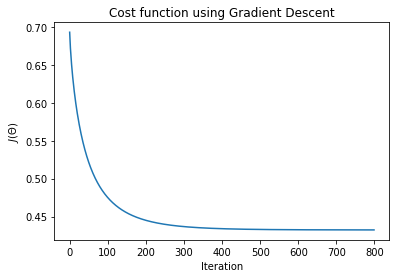

In [12]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [19]:
# Accuracy
sum((sigmoid(X_mapped@theta)>=0.5)==y)

array([98])

In [14]:
def mapforplot(X1,X2):
    degree=6
    # since it will be 1 by features dim
    out=np.ones((1))
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,(np.power(X1,i-j) * np.power(X2,j))))
    return out

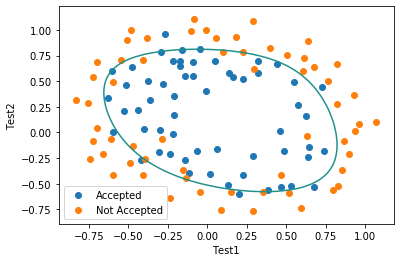

In [15]:
# The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values
# parameters in the range of X1 and X2
u=np.linspace(min(X[:,1]),max(X[:,1]),50)
v=np.linspace(min(X[:,2]),max(X[:,2]),50)
# since 50 features
# to store predicted
z=np.zeros((50,50))
for i in range(50):
    for j in range(50):
        # as features are more need to map
        # return 1 * 28 feature each time for each u and v X * theta
        z[i,j]=np.dot(mapforplot(u[i],v[j]),theta)
        

m=len(y)
mask=y==1
X=df.iloc[:,0:2]
accepted=plt.scatter(X[mask][0],X[mask][1])
notaccepted=plt.scatter(X[~mask][0],X[~mask][1])
# u v are range of X1 and X2
plt.contour(u,v,z,0)
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.legend((accepted,notaccepted),('Accepted','Not Accepted'))